# Notebook para Trainamento do XGBoost

# Importar Bibliotecas Necessárias
Aqui importamos todas as bibliotecas necessárias que serão usadas neste notebook, incluindo o Pandas para manipulação de dados, XGBoost para construir o modelo de classificação, e várias funções do sklearn para avaliação do modelo.


In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Carregar e Balancear o Conjunto de Dados
Nós carregamos os dados de um arquivo Parquet. Dado o possível problema de desbalanceamento de classes com a variável 'SUICIDIO', balanceamos o conjunto de dados subamostrando a classe majoritária para igualar a contagem da classe minoritária. Isso ajuda a evitar que o modelo tenha viés em direção à classe majoritária.


In [3]:
df = pd.read_parquet('../data/processed/sim_2006_2017.parquet')
suicidio_0 = df[df['SUICIDIO'] == 0]
suicidio_1 = df[df['SUICIDIO'] == 1]
suicidio_0_sample = suicidio_0.sample(n=len(suicidio_1), replace=False)
balanced_df = pd.concat([suicidio_0_sample, suicidio_1], ignore_index=True).reset_index(drop=True)
df

,ESC,ESTCIV,IDADE,NATURAL,OCUP,RACACOR,MASCULINO,FEMININO,SUICIDIO
0,-1.732328,0.809986,-0.187545,-1,0.844239,-0.484485,True,False,0
1,-0.226709,-0.329698,0.753377,-1,-1.066134,3.994021,True,False,0
2,-0.226709,0.240144,1.380658,-1,-0.337181,-0.484485,False,True,0
3,-0.226709,-0.899540,1.171564,-2,-1.066134,-0.484485,True,False,0
4,-1.732328,0.240144,0.701103,-1,-1.587212,-0.484485,False,True,0
...,...,...,...,...,...,...,...,...,...
3045770,-0.979518,-0.899540,-1.337560,35,0.844239,3.994021,False,True,0
3045771,-0.000199,3.659197,-0.082998,35,-1.587212,-0.484485,True,False,0
3045772,-0.226709,-0.899540,-0.605732,29,0.844239,1.194955,True,False,0
3045773,-0.226709,0.240144,1.067017,35,0.844239,-0.484485,True,False,0


# Preparar Dados para Treinamento
Aqui, selecionamos as características e a variável alvo do DataFrame balanceado, seguido pela divisão dos dados em conjuntos de treinamento e teste para avaliar o desempenho do modelo posteriormente.


In [4]:
X = balanced_df[['ESC', 'ESTCIV', 'IDADE' ,    'NATURAL' ,    'OCUP',    'RACACOR'    ,'MASCULINO',    'FEMININO'    ]].values
y = balanced_df['SUICIDIO'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o Modelo XGBoost
Definimos e treinamos o classificador XGBoost. O XGBoost é escolhido por sua eficiência e eficácia em lidar com vários tipos de dados e por seu desempenho em tarefas de classificação.


In [5]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Avaliar o Modelo
Após treinar o modelo, prevemos os resultados do conjunto de teste e avaliamos o desempenho do modelo usando acurácia, relatório de classificação e matriz de confusão. Essas métricas nos ajudam a entender a capacidade do modelo de generalizar dados não vistos, precisão, recall, f1-score e acurácia geral.

In [6]:
y_pred = xgb_clf.predict(X_test)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78      4745
           1       0.77      0.80      0.79      4688

    accuracy                           0.78      9433
   macro avg       0.79      0.79      0.78      9433
weighted avg       0.79      0.78      0.78      9433

Matriz de Confusão:
 [[3642 1103]
 [ 926 3762]]


## Visualização dos dados

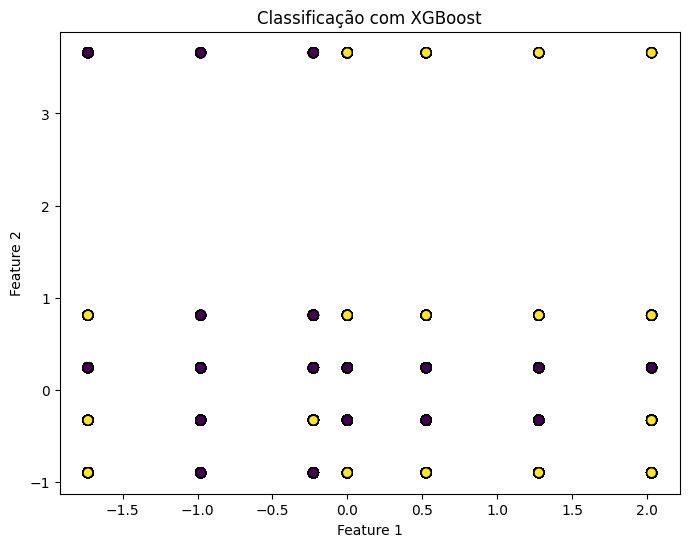

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:,0], X_test[:,1],c=y_pred,cmap='viridis', edgecolors='black', s=50)
plt.title("Classificação com XGBoost")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [8]:
geovanna = pd.DataFrame({'ESC': 5,    'ESTCIV': 1,    'IDADE': 22,    'NATURAL': 53,    'OCUP': -1,    'RACACOR': 4,    'MASCULINO': False,    'FEMININO': True}, index=[0])

arthur = pd.DataFrame({'ESC': 5,    'ESTCIV': 1,    'IDADE': 21,    'NATURAL': 52,    'OCUP': -1,    'RACACOR': 1,    'MASCULINO': True,    'FEMININO': False}, index=[0])



doug = pd.DataFrame({'ESC': 4,    'ESTCIV': 2,    'IDADE': 34,    'NATURAL': 29,    'OCUP': 5132,    'RACACOR': 4,    'MASCULINO': True,    'FEMININO': False}, index=[0])



cozinheiro = pd.DataFrame({'ESC': 4,    'ESTCIV': 2,    'IDADE': 34,    'NATURAL': 29,    'OCUP': 5132,    'RACACOR': 4,    'MASCULINO': True,    'FEMININO': False}, index=[0])

In [9]:
teste = pd.concat((geovanna, arthur, doug, cozinheiro), ignore_index=True)

std = StandardScaler()
columns = ['ESC', 'ESTCIV', 'IDADE', 'OCUP', 'RACACOR']
teste[columns] = std.fit_transform(teste[columns])
x = teste[['ESC', 'ESTCIV', 'IDADE', 'NATURAL', 'OCUP', 'RACACOR', 'MASCULINO', 'FEMININO']].values

In [11]:
y_pred = xgb_clf.predict(x)
y_pred

array([1, 1, 0, 0])